In [9]:
import cohere
from llama_index import SimpleDirectoryReader, download_loader

from api_keys import cohere_api_key
import os

## Problem Statement: A lot of LLM papers to read, but not a lot of time.

My solution was to use Cohere to help rerank and summarize the papers given whatever I was curious about. 

Here is a picture of my todolist of papers to read:

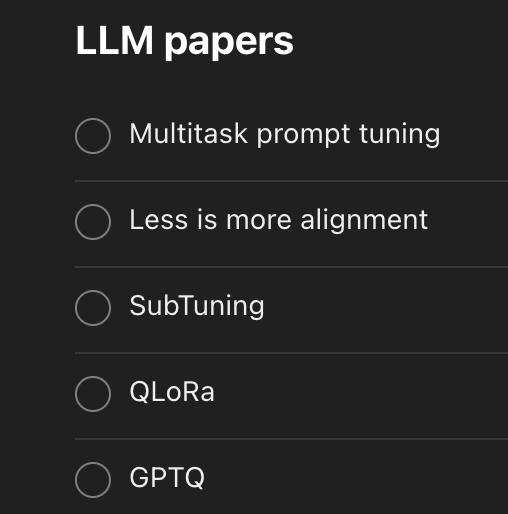

## Load Papers

Documents comes from ArXiv relevant to the topics of large model quantization and finetuning

In [16]:
documents = SimpleDirectoryReader("./docs").load_data()
documents = [doc.text for doc in documents if len(doc.text) > 0]

documents[:5]

['Published as a conference paper at ICLR 2023\nGPTQ: A CCURATE POST-TRAINING QUANTIZATION\nFOR GENERATIVE PRE-TRAINED TRANSFORMERS\nElias Frantar\x03\nIST AustriaSaleh Ashkboos\nETH ZurichTorsten Hoeﬂer\nETH ZurichDan Alistarh\nIST Austria & NeuralMagic\nABSTRACT\nGenerative Pre-trained Transformer models, known as GPT or OPT, set them-\nselves apart through breakthrough performance across complex language mod-\nelling tasks, but also by their extremely high computational and storage costs.\nSpeciﬁcally, due to their massive size, even inference for large, highly-accurate\nGPT models may require multiple performant GPUs, which limits the usability\nof such models. While there is emerging work on relieving this pressure via\nmodel compression, the applicability and performance of existing compression\ntechniques is limited by the scale and complexity of GPT models. In this paper,\nwe address this challenge, and propose GPTQ, a new one-shot weight quantiza-\ntion method based on approxi

In [17]:
co = cohere.Client(cohere_api_key)

## Querying using co.rerank to find relevant documents!

In [34]:
query = "What is double quantization?" # relevant to QLoRA which this is based on!

results = co.rerank(query=query, documents=documents, top_n=1, model='rerank-english-v2.0') 
for idx, r in enumerate(results):
  print(f"Document Rank: {idx + 1}, Document Index: {r.index}")
  print(f"Document: {r.document['text'][:1000]}")
  print(f"Relevance Score: {r.relevance_score:.2f}")
  print("\n")

Document Rank: 1, Document Index: 51
Document: ensure a discrete zeropoint of 0and to use all 2kbits for a k-bit datatype, we create an asymmetric
data type by estimating the quantiles qiof two ranges qi:2k−1for the negative part and 2k−1+ 1for
the positive part and then we unify these sets of qiand remove one of the two zeros that occurs in both
sets. We term the resulting data type that has equal expected number of values in each quantization bin
k-bit NormalFloat (NFk), since the data type is information-theoretically optimal for zero-centered
normally distributed data. The exact values of this data type can be found in Appendix E.
Double Quantization We introduce Double Quantization (DQ), the process of quantizing the
quantization constants for additional memory savings. While a small blocksize is required for precise
4-bit quantization [ 13], it also has a considerable memory overhead. For example, using 32-bit
constants and a blocksize of 64 for W, quantization constants add 32/6

In [33]:
query = "How is Multitask Prompt Tuning different than regular prompt tuning?"

results = co.rerank(query=query, documents=documents, top_n=1, model='rerank-english-v2.0') 
for idx, r in enumerate(results):
  print(f"Document Rank: {idx + 1}, Document Index: {r.index}")
  print(f"Document: {r.document['text'][:1000]}")
  print(f"Relevance Score: {r.relevance_score:.2f}")
  print("\n")

Document Rank: 1, Document Index: 32
Document: Published as a conference paper at ICLR 2023
104105106107108
# of Parameters72.575.077.580.082.585.0Avg. GLUE
104105106107108
# of Parameters60657075Avg. SuperGLUEFT
Adapter
BitFit
PT
SPoT
ATTEMPT
ATTEMPT*
MPT
MPT*
Figure 2: Parameter efﬁciency on GLUE (left) and SuperGLUE (right). Our multitask prompt tuning (MPT)
approach, which transfers a single shared prompt learned from multiple source tasks using prompt decomposi-
tion and distillation, maintains high accuracy ( y-axis) while ﬁnetuning only a small number of parameters per
task (x-axis). All results are based on T5-Base (Raffel et al., 2020). Baselines include: Adapters (Houlsby
et al., 2019), BitFit (Zaken et al., 2022), PT (Lester et al., 2021), SPoT (Vu et al., 2022), and ATTEMPT (Asai
et al., 2022).Indicates multitask training on target tasks. Best viewed in color.
2022) (see Figure 1, top). In this paper, we extend this line of work and introduce multitask prompt
tuning (MPT),

In [32]:
query = "What does GPTQ do?"

results = co.rerank(query=query, documents=documents, top_n=1, model='rerank-english-v2.0') 
for idx, r in enumerate(results):
  print(f"Document Rank: {idx + 1}, Document Index: {r.index}")
  print(f"Document: {r.document['text'][:1000]}")
  print(f"Relevance Score: {r.relevance_score:.2f}")
  print("\n")

Document Rank: 1, Document Index: 0
Document: Published as a conference paper at ICLR 2023
GPTQ: A CCURATE POST-TRAINING QUANTIZATION
FOR GENERATIVE PRE-TRAINED TRANSFORMERS
Elias Frantar
IST AustriaSaleh Ashkboos
ETH ZurichTorsten Hoeﬂer
ETH ZurichDan Alistarh
IST Austria & NeuralMagic
ABSTRACT
Generative Pre-trained Transformer models, known as GPT or OPT, set them-
selves apart through breakthrough performance across complex language mod-
elling tasks, but also by their extremely high computational and storage costs.
Speciﬁcally, due to their massive size, even inference for large, highly-accurate
GPT models may require multiple performant GPUs, which limits the usability
of such models. While there is emerging work on relieving this pressure via
model compression, the applicability and performance of existing compression
techniques is limited by the scale and complexity of GPT models. In this paper,
we address this challenge, and propose GPTQ, a new one-shot weight quantiza-
tion 